<a href="https://colab.research.google.com/github/FilippeFaria/Machine-Learning/blob/main/Pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Leitura das bibliotecas
E dos datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

#verificando a versão do kelarn

# import sklearn

# !pip uninstall scikit-learn -y

# !pip install -U scikit-learn

In [2]:
dataset = pd.read_csv('/content/drive/MyDrive/train.csv')

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
df = dataset.copy()
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Separação Treino e Teste

In [5]:
from sklearn.model_selection import train_test_split
X = df.drop('SalePrice',axis=1)
y = df.SalePrice

X_tr,X_ts,y_tr,y_ts = train_test_split(X, y, test_size=0.33, random_state=42)

# Missing Values

In [6]:
null_values = X_tr.isnull().sum()[X_tr.isnull().sum() > 0]/len(X_tr)*100
null_values.sort_values(ascending= False)

PoolQC          99.591002
MiscFeature     96.012270
Alley           93.558282
Fence           80.470348
FireplaceQu     47.750511
LotFrontage     18.711656
GarageYrBlt      5.419223
GarageType       5.419223
GarageFinish     5.419223
GarageQual       5.419223
GarageCond       5.419223
BsmtFinType2     2.556237
BsmtFinType1     2.556237
BsmtExposure     2.556237
BsmtCond         2.556237
BsmtQual         2.556237
MasVnrArea       0.204499
MasVnrType       0.204499
Electrical       0.102249
dtype: float64

Por terem tanto valores nulos, o que resta é pouco representativo para a base, vou excluir as seguintes colunas

**PoolQC**: Pool quality

**MiscFeature**: Miscellaneous feature not covered in other categories - Também não relevante

**Alley**: Type of alley access to property - Não relevante


In [7]:
X_tr_o = X_tr.copy()
X_ts_o = X_ts.copy()

X_tr_o = X_tr_o.drop(columns=['PoolQC','MiscFeature','Alley'])
X_ts_o = X_ts_o.drop(columns=['PoolQC','MiscFeature','Alley'])
null_values = X_tr_o.isnull().sum()[X_tr_o.isnull().sum() > 0]/len(X_tr_o)*100
null_values.sort_values(ascending= False)

Fence           80.470348
FireplaceQu     47.750511
LotFrontage     18.711656
GarageCond       5.419223
GarageQual       5.419223
GarageFinish     5.419223
GarageYrBlt      5.419223
GarageType       5.419223
BsmtFinType2     2.556237
BsmtFinType1     2.556237
BsmtExposure     2.556237
BsmtCond         2.556237
BsmtQual         2.556237
MasVnrArea       0.204499
MasVnrType       0.204499
Electrical       0.102249
dtype: float64

As seguintes variáveis já possuem uma significante amostragem de valores não nulos. Faz sentido preencher a ausência por -1 nesses casos

**FireplaceQu**: Fireplace quality

**Fence**: Fence quality



In [8]:
X_tr_o[['FireplaceQu','Fence']] = X_tr_o[['FireplaceQu','Fence']].fillna('Inexist')
X_tr_o[['FireplaceQu','Fence']]

,FireplaceQu,Fence
615,Inexist,MnPrv
613,Inexist,Inexist
1303,Inexist,Inexist
486,Inexist,Inexist
561,TA,Inexist
...,...,...
1095,Gd,Inexist
1130,TA,MnPrv
1294,Inexist,Inexist
860,Gd,GdPrv


**LotFrontage**: Linear feet of street connected to property

In [9]:
X_tr_o.LotFrontage.describe()

count    795.000000
mean      70.284277
std       25.532805
min       21.000000
25%       59.500000
50%       70.000000
75%       80.000000
max      313.000000
Name: LotFrontage, dtype: float64

Comparar o preço médio da casa com LotFrontage nulo, com os normais

In [10]:
print('Preço médio nulo: ',y_tr[X_tr_o.LotFrontage.isna()].mean())
print('Preço médio n/nulo: ',y_tr[X_tr_o.LotFrontage.isna() == False].mean())
print('Diferença: ',(y_tr[X_tr_o.LotFrontage.isna()].mean()-y_tr[X_tr_o.LotFrontage.isna() == False].mean())/y_tr.mean()*100,'%')

Preço médio nulo:  181542.4863387978
Preço médio n/nulo:  180932.8893081761
Diferença:  0.33670659116431556 %


É possível ver que os valores, por serem nulos possuem um impacto na variável resposta, dessa forma vou tratar como um valor particular -1

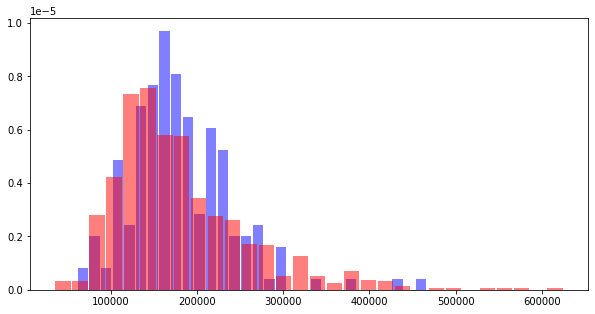

In [11]:
plt.figure(figsize=(10,5))
plt.hist(y_tr[X_tr_o.LotFrontage.isna()], rwidth=0.9,bins=30, density=True,color= 'b', alpha=0.5)
plt.hist(y_tr[X_tr_o.LotFrontage.isna() == False], rwidth=0.9,bins=30, density=True,color= 'r', alpha=0.5);

In [12]:
X_tr_o.LotFrontage = X_tr_o.LotFrontage.fillna(-1)
X_ts_o.LotFrontage = X_ts_o.LotFrontage.fillna(-1)

In [13]:
null_values = X_tr_o.isnull().sum()[X_tr_o.isnull().sum() > 0]/len(X_tr_o)*100
null_values.sort_values(ascending= False)

GarageCond      5.419223
GarageQual      5.419223
GarageFinish    5.419223
GarageYrBlt     5.419223
GarageType      5.419223
BsmtFinType2    2.556237
BsmtFinType1    2.556237
BsmtExposure    2.556237
BsmtCond        2.556237
BsmtQual        2.556237
MasVnrArea      0.204499
MasVnrType      0.204499
Electrical      0.102249
dtype: float64

Tratamento das variáveis relacionadas à garagem: Como os nulos são casas sem garagem, irei especificar em meu modelo

**GarageType**: Garage location
		
**GarageYrBlt**: Year garage was built
		
**GarageFinish**: Interior finish of the garage

**GarageCars**: Size of garage in car capacity - Altamente correlacionada com car GarageArea

**GarageArea**: Size of garage in square feet - Altamente correlacionada com car GarageCars

**GarageQual**: Garage quality

**GarageCond**: Garage condition


In [14]:
garage_cols = X_tr_o.columns[(X_tr_o.columns).str.contains('Garage')]
for col,dtypes in X_tr_o[garage_cols].dtypes.items():
  if dtypes == 'object':
    X_tr_o[col] = X_tr_o[col].fillna('Inexist')
    X_ts_o[col] = X_ts_o[col].fillna('Inexist')
  else:
    X_tr_o[col] = X_tr_o[col].fillna(-1)
    X_ts_o[col] = X_ts_o[col].fillna(-1)
X_tr_o

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition
615,616,85,RL,80.0,8800,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,SFoyer,6,7,1963,1963,Gable,CompShg,MetalSd,MetalSd,BrkFace,156.0,TA,Gd,PConc,TA,TA,Gd,GLQ,763,Unf,0,173,936,GasA,Ex,Y,SBrkr,1054,0,0,1054,1,0,1,0,3,1,Gd,6,Typ,0,Inexist,Attchd,1963.0,RFn,2,480,TA,TA,Y,120,0,0,0,0,0,MnPrv,0,5,2010,WD,Abnorml
613,614,20,RL,70.0,8402,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Feedr,Norm,1Fam,1Story,5,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,ALQ,206,Unf,0,914,1120,GasA,Ex,Y,SBrkr,1120,0,0,1120,0,0,1,0,3,1,TA,6,Typ,0,Inexist,Inexist,-1.0,Inexist,0,0,Inexist,Inexist,Y,0,30,0,0,0,0,Inexist,0,12,2007,New,Partial
1303,1304,20,RL,73.0,8688,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2005,2005,Gable,CompShg,VinylSd,VinylSd,BrkFace,228.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,1616,1616,GasA,Ex,Y,SBrkr,1616,0,0,1616,0,0,2,0,3,1,Gd,7,Typ,0,Inexist,Attchd,2005.0,RFn,3,834,TA,TA,Y,208,59,0,0,0,0,Inexist,0,4,2006,WD,Normal
486,487,20,RL,79.0,10289,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1965,1965,Hip,CompShg,MetalSd,MetalSd,BrkFace,168.0,TA,TA,CBlock,TA,TA,No,ALQ,836,Unf,0,237,1073,GasA,TA,Y,SBrkr,1073,0,0,1073,1,0,1,1,3,1,TA,6,Typ,0,Inexist,Attchd,1965.0,RFn,2,515,TA,TA,Y,0,0,0,0,0,0,Inexist,0,6,2007,WD,Normal
561,562,20,RL,77.0,10010,Pave,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,5,5,1974,1975,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,Gd,TA,Av,ALQ,1071,LwQ,123,195,1389,GasA,Gd,Y,SBrkr,1389,0,0,1389,1,0,1,0,2,1,TA,6,Typ,1,TA,Attchd,1975.0,RFn,2,418,TA,TA,Y,240,38,0,0,0,0,Inexist,0,4,2006,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,1096,20,RL,78.0,9317,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,6,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,24,Unf,0,1290,1314,GasA,Gd,Y,SBrkr,1314,0,0,1314,0,0,2,0,3,1,Gd,6,Typ,1,Gd,Attchd,2006.0,RFn,2,440,TA,TA,Y,0,22,0,0,0,0,Inexist,0,3,2007,WD,Normal
1130,1131,50,RL,65.0,7804,Pave,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,1Fam,1.5Fin,4,3,1928,1950,Gable,CompShg,WdShing,Plywood,None,0.0,TA,TA,BrkTil,TA,TA,No,BLQ,622,Unf,0,500,1122,GasA,TA,Y,SBrkr,1328,653,0,1981,1,0,2,0,4,1,Gd,7,Min2,2,TA,Detchd,1981.0,Unf,2,576,TA,TA,Y,431,44,0,0,0,0,MnPrv,0,12,2009,WD,Normal
1294,1295,20,RL,60.0,8172,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1955,1990,Hip,CompShg,WdShing,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,167,Unf,0,697,864,GasA,TA,Y,SBrkr,864,0,0,864,1,0,1,0,2,1,TA,5,Typ,0,Inexist,Detchd,1957.0,Unf,2,572,TA,TA,N,0,0,0,0,0,0,Inexist,0,4,2006,WD,Normal
860,861,50,RL,55.0,7642,Pave,Reg,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,1.5Fin,7,8,1918,1998,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,912,912,GasA,Gd,Y,SBrkr,912,514,0,1426,0,0,1,1,3,1,Gd,7,Typ,1,Gd,Detchd,1925.0,Unf,1,216,TA,TA,Y,0,240,0,0,0,0,GdPrv,0,6,2007,WD,Normal


O resto possui pouco parte dos dados como valores nulos, irei exclui-los

In [15]:
null_rows_tr = X_tr_o[X_tr_o.isnull().any(axis=1)].index
null_rows_ts = X_ts_o[X_ts_o.isnull().any(axis=1)].index

X_tr_o = X_tr_o.drop(null_rows_tr)
y_tr = y_tr.drop(null_rows_tr)

X_ts_o = X_ts_o.drop(null_rows_ts)
y_ts = y_ts.drop(null_rows_ts)

In [16]:
null_values = X_tr_o.isnull().sum()[X_tr_o.isnull().sum() > 0]/len(X_tr_o)*100
null_values.sort_values(ascending= False)

Series([], dtype: float64)

# Standalizing

In [20]:
from sklearn.preprocessing import RobustScaler

X_tr_std = X_tr_o.copy()
X_ts_std = X_ts_o.copy()


scalers = {}
for col,dtypes in X_tr_std.dtypes.items():
  if dtypes != 'object':
    scaler = RobustScaler()
    scaler.fit(X_tr_std[[col]])
    X_tr_std.loc[:,col] = scaler.transform(X_tr_std[[col]])
    X_ts_std.loc[:,col] = scaler.transform(X_ts_std[[col]])
    scalers[col] = scaler

X_tr_std

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition
615,-0.152159,0.7,RL,0.425,-0.194446,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,SFoyer,0.0,2.0,-0.212766,-0.851351,Gable,CompShg,MetalSd,MetalSd,BrkFace,0.892704,TA,Gd,PConc,TA,TA,Gd,GLQ,0.474241,Unf,0.0,-0.569170,-0.160080,GasA,Ex,Y,SBrkr,-0.085360,0.000000,0.0,-0.667715,1.0,0.0,-1.0,0.0,0.0,0.0,Gd,0.0,Typ,-1.0,Inexist,Attchd,-0.350877,RFn,0.0,-0.017857,TA,TA,Y,0.681818,-0.378378,0.0,0.0,0.0,0.0,MnPrv,0.0,-0.333333,1.0,WD,Abnorml
613,-0.154817,-0.6,RL,0.175,-0.291183,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Feedr,Norm,1Fam,1Story,-0.5,0.0,0.723404,0.337838,Gable,CompShg,VinylSd,VinylSd,None,0.000000,TA,TA,PConc,Gd,TA,No,ALQ,-0.285909,Unf,0.0,0.732543,0.208104,GasA,Ex,Y,SBrkr,0.045658,0.000000,0.0,-0.563901,0.0,0.0,-1.0,0.0,0.0,0.0,TA,0.0,Typ,-1.0,Inexist,Inexist,-46.292398,Inexist,-2.0,-2.160714,Inexist,Inexist,Y,0.000000,0.027027,0.0,0.0,0.0,0.0,Inexist,0.0,2.000000,-0.5,New,Partial
1303,0.762126,-0.6,RL,0.250,-0.221669,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,0.5,0.0,0.680851,0.283784,Gable,CompShg,VinylSd,VinylSd,BrkFace,1.304721,Gd,TA,PConc,Gd,TA,Av,Unf,-0.567042,Unf,0.0,1.965744,1.200600,GasA,Ex,Y,SBrkr,1.030273,0.000000,0.0,0.216280,0.0,0.0,0.0,0.0,0.0,0.0,Gd,0.5,Typ,-1.0,Inexist,Attchd,0.631579,RFn,1.0,1.562500,TA,TA,Y,1.181818,0.418919,0.0,0.0,0.0,0.0,Inexist,0.0,-0.666667,-1.0,WD,Normal
486,-0.323588,-0.6,RL,0.400,0.167467,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,-0.5,2.0,-0.170213,-0.797297,Hip,CompShg,MetalSd,MetalSd,BrkFace,0.961373,TA,TA,CBlock,TA,TA,No,ALQ,0.573866,Unf,0.0,-0.456741,0.114057,GasA,TA,Y,SBrkr,-0.047643,0.000000,0.0,-0.637829,1.0,0.0,-1.0,1.0,0.0,0.0,TA,0.0,Typ,-1.0,Inexist,Attchd,-0.304094,RFn,0.0,0.138393,TA,TA,Y,0.000000,-0.378378,0.0,0.0,0.0,0.0,Inexist,0.0,0.000000,-0.5,WD,Normal
561,-0.223920,-0.6,RL,0.350,0.099654,Pave,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,-0.5,0.0,0.021277,-0.527027,Gable,CompShg,HdBoard,HdBoard,None,0.000000,TA,TA,CBlock,Gd,TA,Av,ALQ,0.894575,LwQ,123.0,-0.530523,0.746373,GasA,Gd,Y,SBrkr,0.579653,0.000000,0.0,-0.140779,1.0,0.0,-1.0,0.0,-1.0,0.0,TA,0.0,Typ,0.0,TA,Attchd,-0.070175,RFn,0.0,-0.294643,TA,TA,Y,1.363636,0.135135,0.0,0.0,0.0,0.0,Inexist,0.0,-0.666667,-1.0,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,0.485714,-0.6,RL,0.375,-0.068785,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,0.0,0.0,0.702128,0.310811,Gable,CompShg,VinylSd,VinylSd,None,0.000000,Gd,TA,PConc,Gd,TA,No,GLQ,-0.534289,Unf,0.0,1.393061,0.596298,GasA,Gd,Y,SBrkr,0.430769,0.000000,0.0,-0.258750,0.0,0.0,0.0,0.0,0.0,0.0,Gd,0.0,Typ,0.0,Gd,Attchd,0.654971,RFn,0.0,-0.196429,TA,TA,Y,0.000000,-0.081081,0.0,0.0,0.0,0.0,Inexist,0.0,-1.000000,-0.5,WD,Normal
1130,0.532226,0.0,RL,0.050,-0.436532,Pave,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,1Fam,1.5Fin,-1.0,-2.0,-0.957447,-1.202703,Gable,CompShg,WdShing,Plywood,None,0.000000,TA,TA,BrkTil,TA,TA,No,BLQ,0.281815

# Encoding

Muitas das variáveis são ordinais, ou seja, que tenha uma sequência lógica. Elas extão padronizadas em:

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

Vou fazer o encoding com base nisso.

In [21]:
from sklearn.preprocessing import OrdinalEncoder
X_tr_enc = X_tr_std.copy()
X_ts_enc = X_ts_std.copy()

encoder = {}
default_cat = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
for col,dtype in X_tr_enc.dtypes.items():
    if dtype == 'object':
      encoder[col] = OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value= -1,categories=[default_cat])
      X_tr_enc.loc[:,col] = encoder[col].fit_transform(X_tr_enc[[col]],)
      X_ts_enc.loc[:,col] = encoder[col].transform(X_ts_enc[[col]])

X_tr_enc


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition
615,-0.152159,0.7,-1.0,0.425,-0.194446,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,2.0,-0.212766,-0.851351,-1.0,-1.0,-1.0,-1.0,-1.0,0.892704,2.0,3.0,-1.0,2.0,2.0,3.0,-1.0,0.474241,-1.0,0.0,-0.569170,-0.160080,-1.0,4.0,-1.0,-1.0,-0.085360,0.000000,0.0,-0.667715,1.0,0.0,-1.0,0.0,0.0,0.0,3.0,0.0,-1.0,-1.0,-1.0,-1.0,-0.350877,-1.0,0.0,-0.017857,2.0,2.0,-1.0,0.681818,-0.378378,0.0,0.0,0.0,0.0,-1.0,0.0,-0.333333,1.0,-1.0,-1.0
613,-0.154817,-0.6,-1.0,0.175,-0.291183,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.5,0.0,0.723404,0.337838,-1.0,-1.0,-1.0,-1.0,-1.0,0.000000,2.0,2.0,-1.0,3.0,2.0,-1.0,-1.0,-0.285909,-1.0,0.0,0.732543,0.208104,-1.0,4.0,-1.0,-1.0,0.045658,0.000000,0.0,-0.563901,0.0,0.0,-1.0,0.0,0.0,0.0,2.0,0.0,-1.0,-1.0,-1.0,-1.0,-46.292398,-1.0,-2.0,-2.160714,-1.0,-1.0,-1.0,0.000000,0.027027,0.0,0.0,0.0,0.0,-1.0,0.0,2.000000,-0.5,-1.0,-1.0
1303,0.762126,-0.6,-1.0,0.250,-0.221669,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.5,0.0,0.680851,0.283784,-1.0,-1.0,-1.0,-1.0,-1.0,1.304721,3.0,2.0,-1.0,3.0,2.0,-1.0,-1.0,-0.567042,-1.0,0.0,1.965744,1.200600,-1.0,4.0,-1.0,-1.0,1.030273,0.000000,0.0,0.216280,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.5,-1.0,-1.0,-1.0,-1.0,0.631579,-1.0,1.0,1.562500,2.0,2.0,-1.0,1.181818,0.418919,0.0,0.0,0.0,0.0,-1.0,0.0,-0.666667,-1.0,-1.0,-1.0
486,-0.323588,-0.6,-1.0,0.400,0.167467,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.5,2.0,-0.170213,-0.797297,-1.0,-1.0,-1.0,-1.0,-1.0,0.961373,2.0,2.0,-1.0,2.0,2.0,-1.0,-1.0,0.573866,-1.0,0.0,-0.456741,0.114057,-1.0,2.0,-1.0,-1.0,-0.047643,0.000000,0.0,-0.637829,1.0,0.0,-1.0,1.0,0.0,0.0,2.0,0.0,-1.0,-1.0,-1.0,-1.0,-0.304094,-1.0,0.0,0.138393,2.0,2.0,-1.0,0.000000,-0.378378,0.0,0.0,0.0,0.0,-1.0,0.0,0.000000,-0.5,-1.0,-1.0
561,-0.223920,-0.6,-1.0,0.350,0.099654,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.5,0.0,0.021277,-0.527027,-1.0,-1.0,-1.0,-1.0,-1.0,0.000000,2.0,2.0,-1.0,3.0,2.0,-1.0,-1.0,0.894575,-1.0,123.0,-0.530523,0.746373,-1.0,3.0,-1.0,-1.0,0.579653,0.000000,0.0,-0.140779,1.0,0.0,-1.0,0.0,-1.0,0.0,2.0,0.0,-1.0,0.0,2.0,-1.0,-0.070175,-1.0,0.0,-0.294643,2.0,2.0,-1.0,1.363636,0.135135,0.0,0.0,0.0,0.0,-1.0,0.0,-0.666667,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,0.485714,-0.6,-1.0,0.375,-0.068785,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.702128,0.310811,-1.0,-1.0,-1.0,-1.0,-1.0,0.000000,3.0,2.0,-1.0,3.0,2.0,-1.0,-1.0,-0.534289,-1.0,0.0,1.393061,0.596298,-1.0,3.0,-1.0,-1.0,0.430769,0.000000,0.0,-0.258750,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,-1.0,0.0,3.0,-1.0,0.654971,-1.0,0.0,-0.196429,2.0,2.0,-1.0,0.000000,-0.081081,0.0,0.0,0.0,0.0,-1.0,0.0,-1.000000,-0.5,-1.0,-1.0
1130,0.532226,0.0,-1.0,0.050,-0.436532,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-2.0,-0.957447,-1.202703,-1.0,-1.0,-1.0,-1.0,-1.0,0.000000,2.0,2.0,-1.0,2.0,2.0,-1.0,-1.0,0.281815,-1.0,0.0,0.005270,0.212106,-1.0,2.0,-1.0,-1.

# Correlação

O dataset é composto de variáveis categóricas e númericas, por isso é necessário fazer um tratamento especifico para cada par de variáveis de tipos diferentes.


In [22]:
X_tr_o.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 950 entries, 615 to 1126
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             950 non-null    int64  
 1   MSSubClass     950 non-null    int64  
 2   MSZoning       950 non-null    object 
 3   LotFrontage    950 non-null    float64
 4   LotArea        950 non-null    int64  
 5   Street         950 non-null    object 
 6   LotShape       950 non-null    object 
 7   LandContour    950 non-null    object 
 8   Utilities      950 non-null    object 
 9   LotConfig      950 non-null    object 
 10  LandSlope      950 non-null    object 
 11  Neighborhood   950 non-null    object 
 12  Condition1     950 non-null    object 
 13  Condition2     950 non-null    object 
 14  BldgType       950 non-null    object 
 15  HouseStyle     950 non-null    object 
 16  OverallQual    950 non-null    int64  
 17  OverallCond    950 non-null    int64  
 18  YearBui

In [23]:
categoric_cols = X_tr_o.select_dtypes(include='object')
numeric_cols = X_tr_o.select_dtypes(exclude='object')
categoric_cols

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,Fence,SaleType,SaleCondition
615,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,SFoyer,Gable,CompShg,MetalSd,MetalSd,BrkFace,TA,Gd,PConc,TA,TA,Gd,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Inexist,Attchd,RFn,TA,TA,Y,MnPrv,WD,Abnorml
613,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Feedr,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Inexist,Inexist,Inexist,Inexist,Inexist,Y,Inexist,New,Partial
1303,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,Unf,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Inexist,Attchd,RFn,TA,TA,Y,Inexist,WD,Normal
486,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,BrkFace,TA,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,TA,Y,SBrkr,TA,Typ,Inexist,Attchd,RFn,TA,TA,Y,Inexist,WD,Normal
561,RL,Pave,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,Gable,CompShg,HdBoard,HdBoard,None,TA,TA,CBlock,Gd,TA,Av,ALQ,LwQ,GasA,Gd,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,Inexist,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,Inexist,WD,Normal
1130,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,WdShing,Plywood,None,TA,TA,BrkTil,TA,TA,No,BLQ,Unf,GasA,TA,Y,SBrkr,Gd,Min2,TA,Detchd,Unf,TA,TA,Y,MnPrv,WD,Normal
1294,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,Hip,CompShg,WdShing,Plywood,None,TA,TA,CBlock,TA,TA,No,Rec,Unf,GasA,TA,Y,SBrkr,TA,Typ,Inexist,Detchd,Unf,TA,TA,N,Inexist,WD,Normal
860,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,Wd Sdng,Wd Sdng,None,Gd,TA,BrkTil,TA,TA,No,Unf,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,GdPrv,WD,Normal


Será feito o seguinte tratamento para os tipos de variáveis, entre: 

- Númericas e categóricas: **Correlation_Ratio**

- Categóricas: **Cramers-V**

- Númericas: Persons



In [24]:
def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories.reset_index(drop=True))
    cat_num = np.max(fcat)+1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0,cat_num):
        cat_measures = measurements.reset_index(drop=True)[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
    denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = np.sqrt(numerator/denominator)
    return eta


import scipy.stats as ss
def cramers_v(x, y):
  confusion_matrix = pd.crosstab(x,y)
  chi2 = ss.chi2_contingency(confusion_matrix)[0]
  n = confusion_matrix.sum().sum()
  phi2 = chi2/n
  r,k = confusion_matrix.shape
  phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
  rcorr = r-((r-1)**2)/(n-1)
  kcorr = k-((k-1)**2)/(n-1)
  return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [25]:
cor_df = pd.DataFrame(columns=X_tr_o.columns,index=X_tr_o.columns)
cor_num_vs_cat = pd.DataFrame(columns=numeric_cols.columns,index=categoric_cols.columns)
cor_num_vs_num = pd.DataFrame(columns=numeric_cols.columns,index=numeric_cols.columns)
cor_cat_vs_cat = pd.DataFrame(columns=categoric_cols.columns,index=categoric_cols.columns)
cols_analysed = []

for col,dtypes_col in X_tr_o.dtypes.items():
  for index,dtypes_idx in X_tr_o.dtypes.items():
    if ([col,index] in cols_analysed) or ([index,col] in cols_analysed):
      
      continue
    else:
      #Entre uma categorica e uma numerica
      if (dtypes_col == 'object' and dtypes_idx != 'object') or (dtypes_idx == 'object' and dtypes_col != 'object'):

        if (dtypes_col == 'object' and dtypes_idx != 'object'):
          cor = correlation_ratio(X_tr_o[col], X_tr_o[index])
          cor_num_vs_cat.loc[col,index] = cor
        elif (dtypes_idx == 'object' and dtypes_col != 'object'):
          cor = correlation_ratio(X_tr_o[index], X_tr_o[col])
        
          cor_num_vs_cat.loc[index,col] = cor

      #Entre duas categóricas
      elif dtypes_col == 'object' and dtypes_idx == 'object':
        cor = cramers_v(X_tr_o[col], X_tr_o[index])
        cor_cat_vs_cat.loc[index,col] = cor
      
      #Entre duas numéricas
      else:
        cor = X_tr_o[col].corr(X_tr_o[index],method='pearson')
        cor_num_vs_num.loc[index,col] = cor

      cols_analysed.append([col,index])
      cor_df.loc[index,col] = cor

cor_df = cor_df.astype('float64')
cor_cat_vs_cat = cor_cat_vs_cat.astype('float64')
cor_num_vs_cat = cor_num_vs_cat.astype('float64')
cor_num_vs_num = cor_num_vs_num.astype('float64')
cor_df


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MSSubClass,-0.002614,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MSZoning,0.077156,0.359680,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotFrontage,-0.022275,-0.214608,0.122736,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotArea,-0.045058,-0.121794,0.189445,0.088984,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MiscVal,0.038684,0.000129,0.038302,-0.054770,0.067766,0.033254,0.039446,0.026047,0.003828,0.021756,0.031402,0.137447,0.121359,0.814595,0.146718,0.133471,-0.041699,0.049120,-0.031584,-0.021066,0.574109,0.015433,0.118677,0.106399,0.072584,-0.026683,0.048554,0.058054,0.129292,0.045874,0.029486,0.033545,0.056794,0.020514,0.154916,0.040563,-0.029441,0.006471,0.020017,0.045834,0.017584,0.033767,0.007184,0.078705,-0.014072,0.070063,-0.001495,0.000655,0.029092,0.060442,0.075527,0.114469,0.055537,0.112440,0.098403,0.073154,0.119611,0.121065,0.017928,0.060350,-0.017809,0.001302,0.036336,0.035184,0.094274,0.019073,0.003614,0.065113,0.007406,0.091651,0.082132,0.083015,1.000000,NaN,NaN,NaN,NaN
MoSold,-0.005872,-0.003371,0.104637,0.015383,0.002017,0.008075,0.049041,0.091187,0.065266,0.033791,0.021188,0.150156,0.086777,0.067205,0.084343,0.048087,0.056501,-0.005663,0.013091,0.032370,0.059829,0.115214,0.096630,0.112805,0.049369,0.002542,0.064358,0.070919,0.023371,0.029321,0.069715,0.071716,0.052214,0.019474,0.065081,-0.034302,0.010085,0.019402,0.064247,0.079882,0.010524,0.048360,0.057976,0.016335,-0.039563,0.053110,-0.030316,0.058671,0.056287,-0.006703,0.042503,0.033559,0.068805,0.034767,0.084450,0.037

### Correlação entre as variáveis categóricas

Usarei aqui método **Cramers-V**, em que a correlação varia de 0 (nada correlacionada) à 1 (inteiramente correlacionada). Ou seja, não possui valores negativos como a correlação que já conhecemos

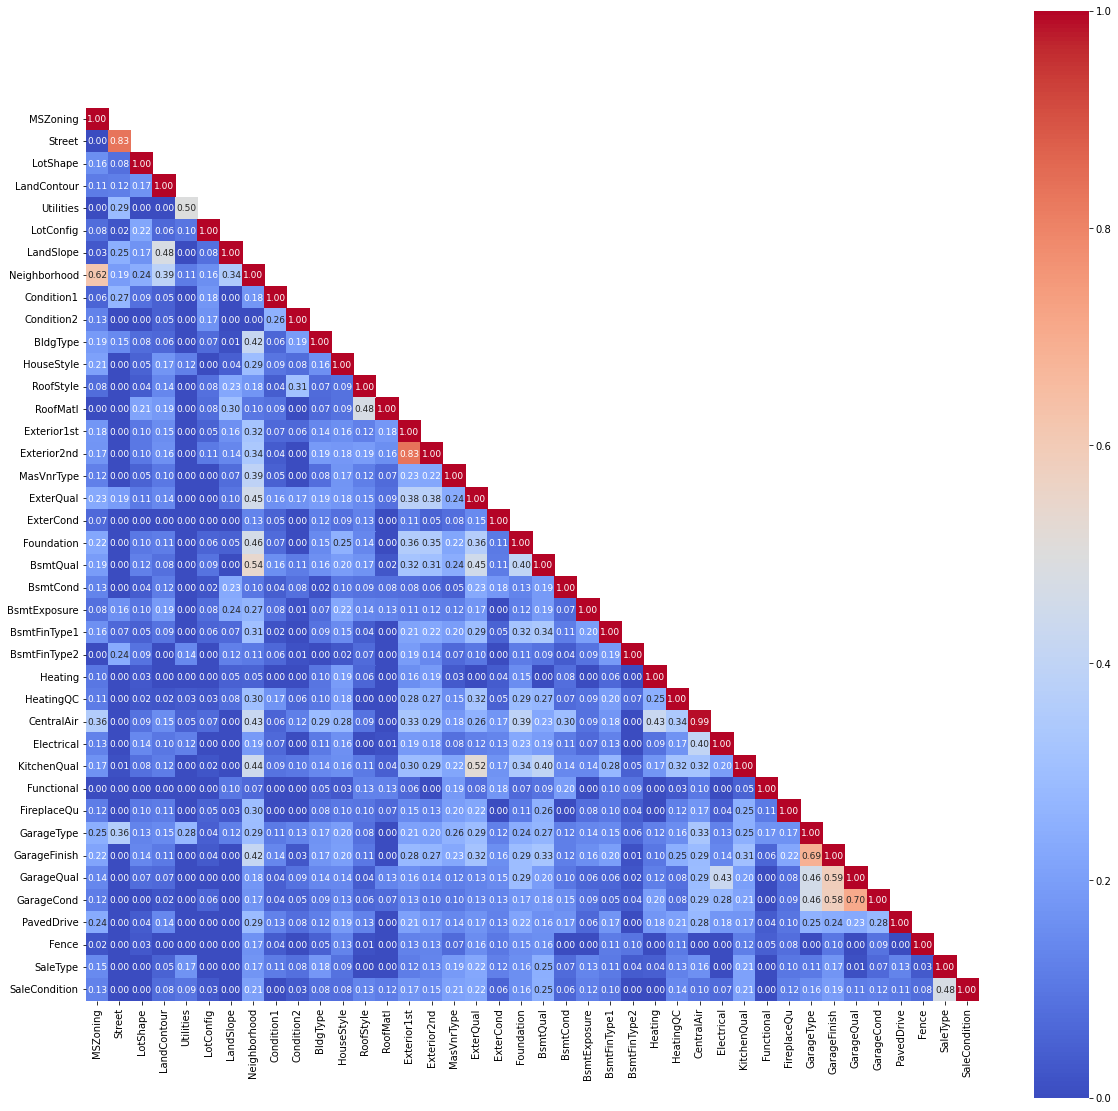

In [26]:
plt.figure(figsize=(20,20))
sn.heatmap(cor_cat_vs_cat.round(6),annot=True, square=True, fmt='.2f',annot_kws={'size':9},  cmap= "coolwarm")

## Correlação entre variáveis continuas e categóricas

Correlation Ratio - O cálculo baseia-se na comparação entre a dipersão da variável númerica Y dado uma categoria X e a dispersão total de Y da população total. 
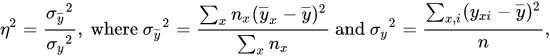

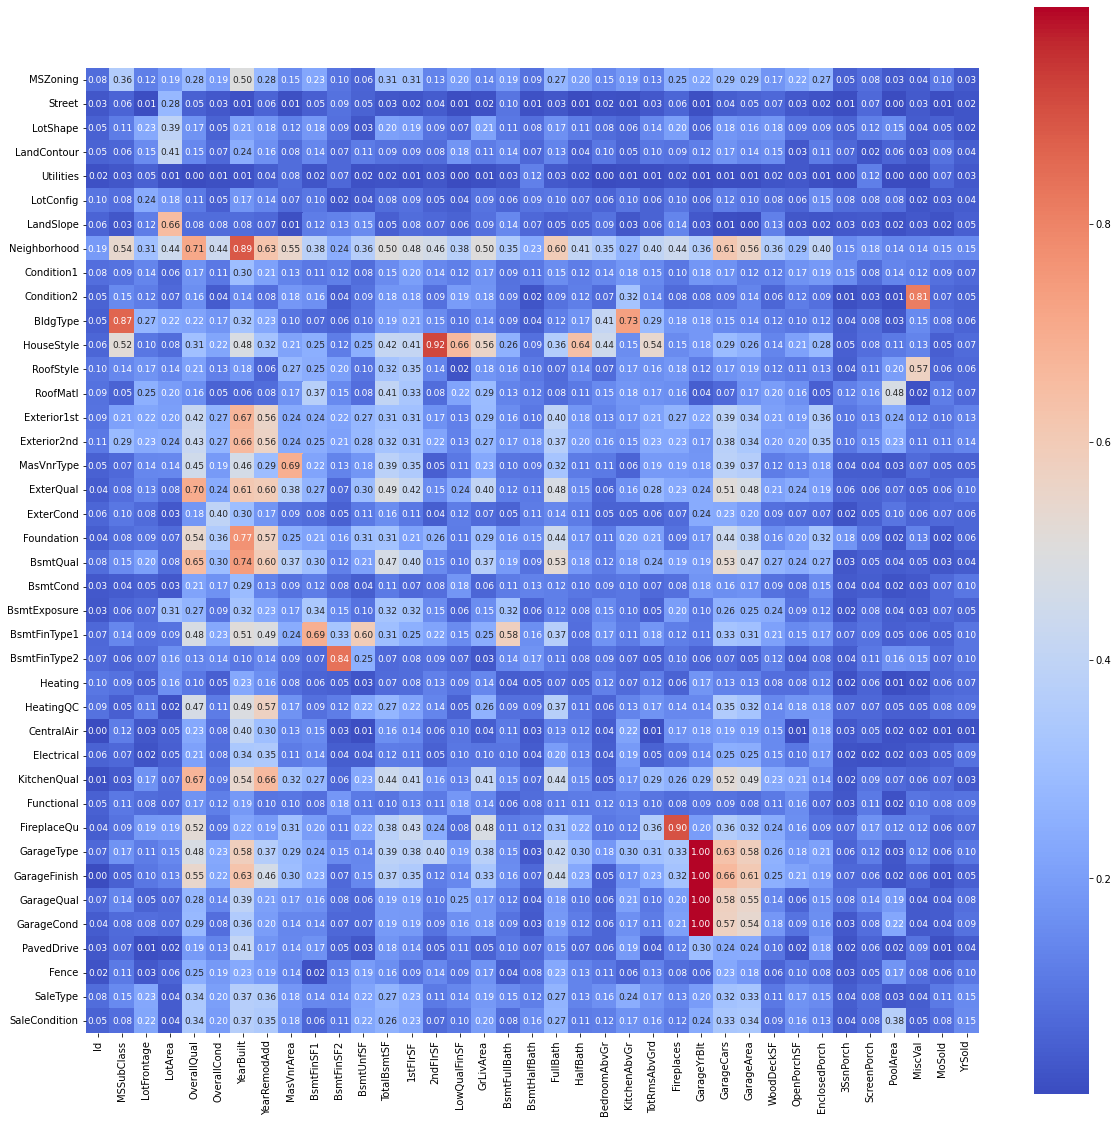

In [27]:

plt.figure(figsize=(20,20))
sn.heatmap(cor_num_vs_cat.round(6),annot=True, square=True, fmt='.2f',annot_kws={'size':9},  cmap= "coolwarm")

## Correlação entre variáveis contínuas

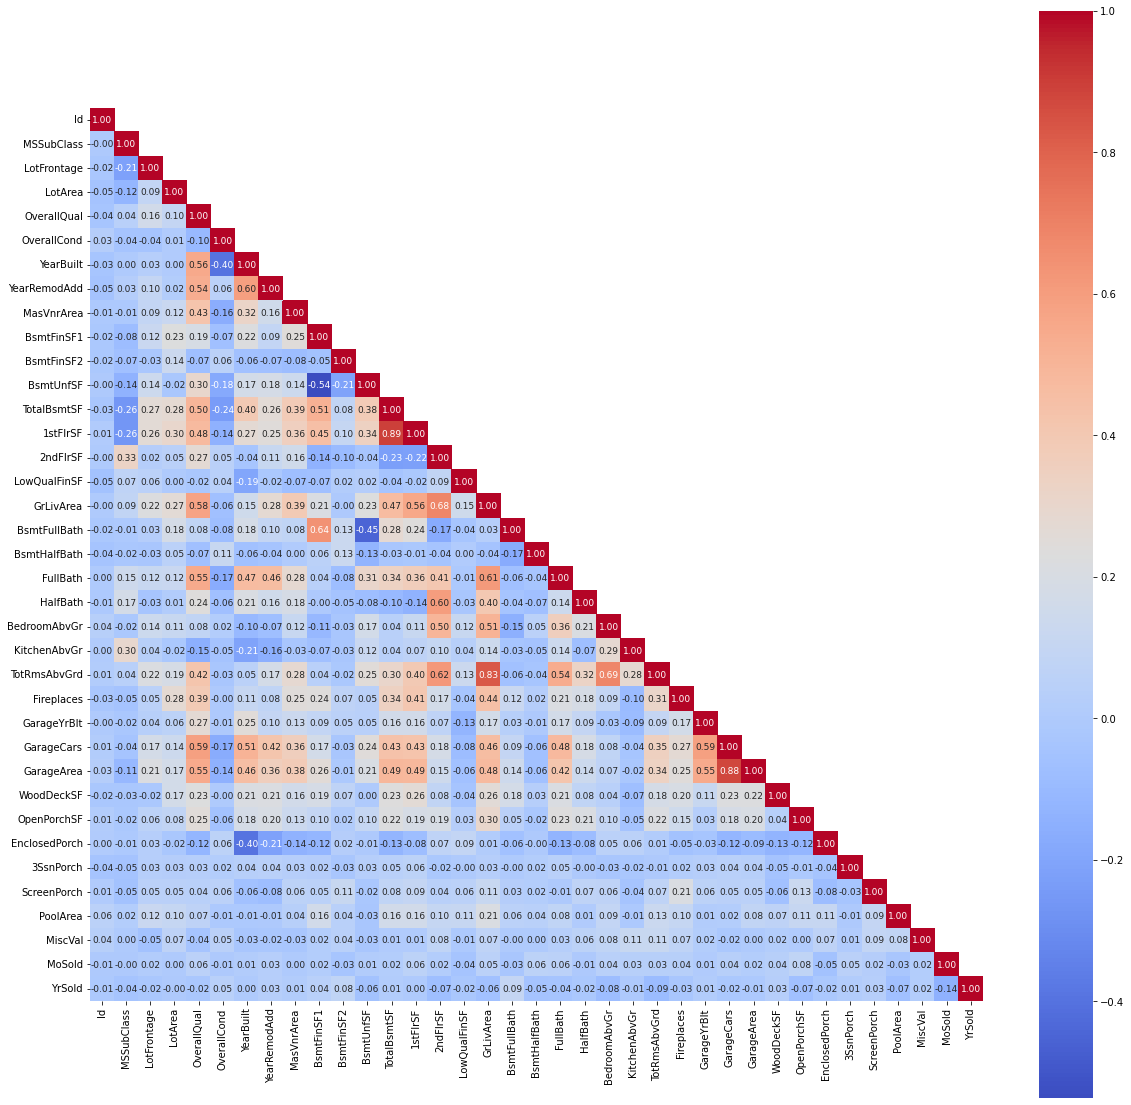

In [28]:

plt.figure(figsize=(20,20))
sn.heatmap(cor_num_vs_num.round(6),annot=True, square=True, fmt='.2f',annot_kws={'size':9},  cmap= "coolwarm")

## Excluindo as colunas correlacionadas

Aqui usarei o função mutual_info_regression do sklearn. O cálculo consiste basicamente na estimação de entropia nas distancias dos k-vizinhos.
Não usei o Teste F para testar a covariância neste caso, pois este teste só reconhece depedência linear, enquanto o mutual_info_regression reconhece qualquer tipo de dependência.

Fonte: https://scikit-learn.org/stable/auto_examples/feature_selection/plot_f_test_vs_mi.html

In [1]:
from sklearn.feature_selection import mutual_info_regression

X_tr_corr = X_tr_enc.copy()
X_ts_corr = X_ts_enc.copy()


dropped = []

for num1,col1 in enumerate(cor_df.columns):
    if col1 in dropped: 
        continue # Pule se a coluna 1 já foi dropada
    for num2,col2 in enumerate(cor_df.index):
        if col1 in dropped:
            break # Pare se a coluna 1 já foi dropada
        if col2 in dropped:
            continue # Continue se a coluna 2 já foi dropada
        if num2 <= num1: 
            continue # Continue se estou olhando para a diagonal inferior da matriz
        if col1==col2:
            continue # Continue se estou olhando para a diagonal da matriz. Pois sempre serão terão corr == 1
        val = cor_df.loc[col2,col1]
        if abs(val) < .7:  # Continue se o valor da correção entre col2 e col1 foi inferior a esse
            continue
            
        
        #mutual_info_classif(y_train.values.reshape(-1,1),y_train)y_train_enc
        imm1 = mutual_info_regression(X_tr_corr[[col1]],np.ravel(y_tr))
        imm2 = mutual_info_regression(X_tr_corr[[col2]],np.ravel(y_tr))
        
        if imm1 > imm2:
            dropped.append(col2.strip())
            print(f'Entre {col1} e {col2}, descartamos {col2}')
        else:
            dropped.append(col1.strip())
            print(f'Entre {col1} e {col2}, descartamos {col1}')


X_tr_corr = X_tr_corr.drop(dropped, axis=1)
X_ts_corr = X_ts_corr.drop(dropped, axis=1)


NameError: ignored

In [ ]:
plt.plot(X_tr_o.groupby('YearBuilt').EnclosedPorch.mean())

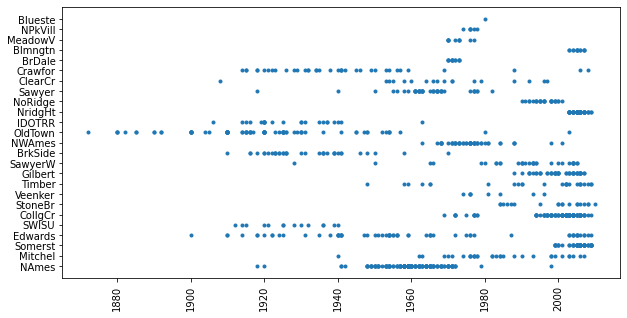

In [31]:
plt.figure(figsize=(10,5))
plt.plot(X_tr_o['YearBuilt'],X_tr_o['Neighborhood'],'.')
plt.xticks(rotation=90);

# Feature Selection

Para seleção das variáveis mais importantes

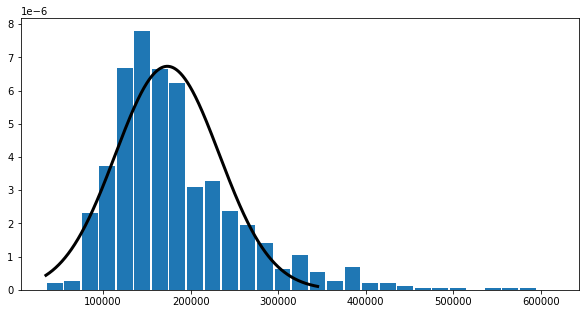

In [32]:
def normal(x,m,s):
    return 1/(np.sqrt(2*np.pi)*s) * np.exp((-1/2) * ((x-m)/s)**2)

plt.figure(figsize=(10,5))
plt.hist(y_tr, bins =list(range(y_tr.min(),y_tr.max(),20000)),rwidth=0.9,density=True)
plt.plot(np.linspace(y_tr_out.min(),y_tr_out.max(),20000), normal(np.linspace(y_tr_out.min(),y_tr_out.max(),20000),y_tr_out.mean(), y_tr_out.std(ddof=1)),
         'k-', lw=3);

In [33]:
normal(np.linspace(y_tr_out.min(),y_tr_out.max(),20000),y_tr_out.mean(), y_tr_out.std(ddof=1))

array([4.37216606e-07, 4.37484220e-07, 4.37751967e-07, ...,
       1.02139055e-07, 1.02061725e-07, 1.01984446e-07])

## LASSO LARS

In [35]:
from sklearn.linear_model import LassoLarsCV

reg = LassoLarsCV(fit_intercept=True,cv=5, normalize=True)
reg.fit(X_tr_corr, y_tr)


LassoLarsCV(cv=5, normalize=True)

### Avaliação

In [36]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

y_pred = reg.predict(X_ts_corr)


print('MAE: ',mean_absolute_error(y_ts, y_pred),mean_absolute_error(y_ts, y_pred)/y_pred.mean())
print('MSE: ',mean_squared_error(y_ts, y_pred,squared=False),mean_squared_error(y_ts, y_pred)/y_pred.mean())


# Com correlação
# MAE:  27008.727607765464 0.152595257462053
# MSE:  60359.56226907547 20583.966888838564

# SEM CORRELAÇÃO
# MAE:  26408.487546878576 0.1491584807576586
# MSE:  59057.82929072074 19699.689558256006

MAE:  25526.913134164617 0.14374241778611174
MSE:  58972.14543058873 19583.057575368468


Existe uma GRANDE diferença entre as métricas MAE E MSE. Isso geralmente se da por conta de outliers na variável resposta.

Vamos dar uma olhada...

### Coeficientes

In [37]:
df_coefs = pd.DataFrame(np.column_stack((X_tr_corr.columns,reg.coef_)),columns=['features','coefs'])
only_important = df_coefs[df_coefs.coefs.abs() > 0]
only_important.sort_values('coefs', ascending=False)

,features,coefs
13,OverallQual,31824.4
37,GrLivArea,23789.4
22,ExterQual,13514
48,GarageCars,12731.4
44,KitchenQual,9327.37
38,BsmtFullBath,6720.64
15,YearBuilt,4603.25
27,BsmtFinSF1,4209.73
25,BsmtExposure,3989.77
16,YearRemodAdd,3910.96


### Análise dos erros

Os erros não estão se distribuindo de forma normal. Provavelmente umproblema de outliers

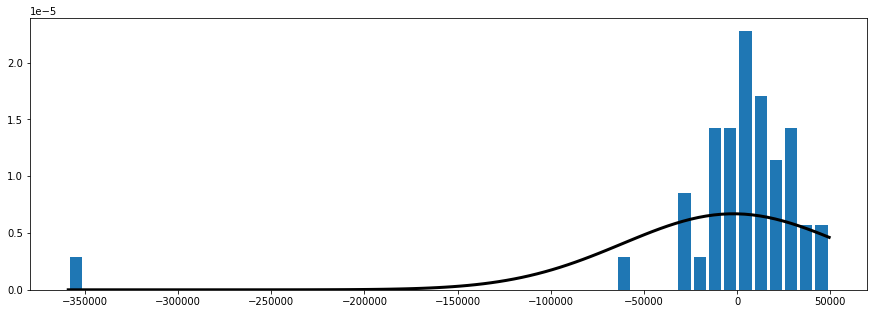

In [38]:
def normal(x,m,s):
    return 1/(np.sqrt(2*np.pi)*s) * np.exp((-1/2) * ((x-m)/s)**2)

plt.figure(figsize=(15,5))
res = y_pred-y_ts
plt.hist(res, bins=50, rwidth=.8, density=True)
plt.plot(np.linspace(res.min(),res.max(),100), normal(np.linspace(res.min(),res.max(),100),res.mean(), res.std(ddof=1)), 'k-', lw=3);

# Regressão Linear
Com as features relevantes

In [41]:
from sklearn.linear_model import LinearRegression
column = only_important.features.unique()
lr = LinearRegression(normalize=True, fit_intercept=True, positive=True)
lr.fit(X_tr_corr[column], y_tr)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


LinearRegression(normalize=True, positive=True)

### Avaliação

In [42]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

y_pred = lr.predict(X_ts_corr[column])


print('MAE: ',mean_absolute_error(y_ts, y_pred))
print('RMSE: ',mean_squared_error(y_ts, y_pred,squared=False))

# SEM CORRELAÇÃO
# MAE:  31988.153602093367
# RMSE:  66011.31829987536

# COM CORRELAÇÃO
# MAE:  29935.304771453517
# RMSE:  62839.579917926145

MAE:  23712.266439111685
RMSE:  54888.467084643344


### Coeficientes

Melhorou consideralvemente os erros. Agora que estamos com os meus betas ótimos para minimização dos erros, vamos analisa-los

In [43]:
df_coefs_lr = pd.DataFrame(np.column_stack((column,lr.coef_)),columns=['features','coefs'])

df_coefs_lr.sort_values('coefs', ascending=False)

,features,coefs
2,OverallQual,29401.9
10,GrLivArea,21612.7
6,ExterQual,14139.7
14,GarageCars,13940.3
12,KitchenQual,9150.73
11,BsmtFullBath,9080.05
4,YearRemodAdd,8015.26
3,YearBuilt,5580.49
7,BsmtExposure,4583.79
8,BsmtFinSF1,4366.54


A variável que mais impacta positivamente é a **OverallQual**	o que faz todo o sentido. Quanto melhor a qualidade em geral, maior o preço.
A variável que mais impactou negativamente no preço foi a **ExterCond**. Por que a quanto melhor a condição externa pior o preço? Precisamos entrar no detalhe

#### ExterCond
ExterCond - valuates the present condition of the material on the exterior


In [44]:
df.ExterCond.value_counts(dropna=False)

TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64

Podemos identificar que os preços sobem conforme a qualidade externa melhora, como deveria. A questão é por que essa variáveil ta afetando negativamente a variável resposta

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 55.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


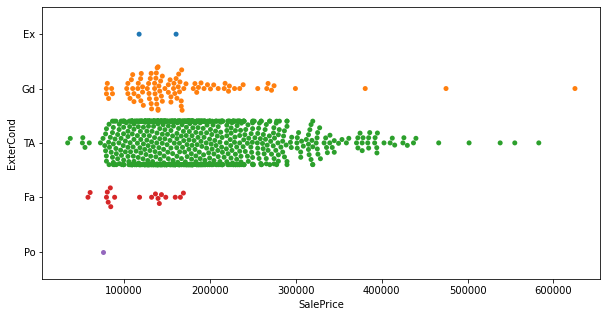

In [45]:
plt.figure(figsize=(10,5))
sn.swarmplot(x = y_tr,y = X_tr_o['ExterCond'],order=default_cat[::-1]);


In [46]:
default_cat


['Po', 'Fa', 'TA', 'Gd', 'Ex']

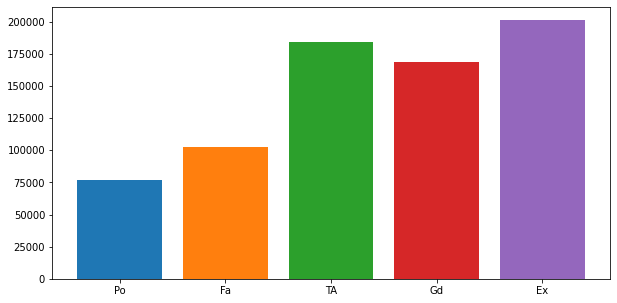

In [47]:
plt.figure(figsize=(10,5))
plt.bar('Po',df[df.ExterCond == 'Po'].SalePrice.mean())
plt.bar('Fa',df[df.ExterCond == 'Fa'].SalePrice.mean())
plt.bar('TA',df[df.ExterCond == 'TA'].SalePrice.mean())
plt.bar('Gd',df[df.ExterCond == 'Gd'].SalePrice.mean())
plt.bar('Ex',df[df.ExterCond == 'Ex'].SalePrice.mean());


A média pode ser impactada pelos outliers, mas dependendo da amostragem pode variar menos. Vamos ver como está distribuição desses outliers dentre as categorias

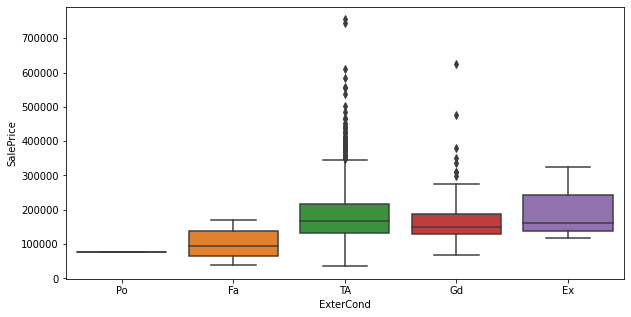

In [48]:
import seaborn as sn
plt.figure(figsize=(10,5))
sn.boxplot(data = df,x='ExterCond',y='SalePrice',order=default_cat)

Interessate! A categoria TA, possui as casos com os maiores valores do dataset, pode ser por isso que está fazendo essa variável ter correlação negativa com a resposta.

#### GarageCond
O mesmo acontece com GarageCondition


In [49]:
X_tr.GarageCond.value_counts().loc[default_cat]

Po      3
Fa     26
TA    886
Gd      8
Ex      2
Name: GarageCond, dtype: int64

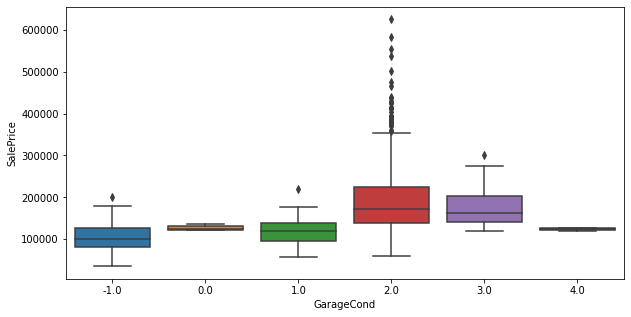

In [50]:

plt.figure(figsize=(10,5))
sn.boxplot(data = pd.concat([X_tr_enc,y_tr],axis=1),x='GarageCond',y='SalePrice')

Comparando com uma variável que está correlacionada, e que modelo retornou que tem beta positivo.

In [51]:
X_tr.GarageQual.value_counts().loc[default_cat]

Po      1
Fa     32
TA    878
Gd     11
Ex      3
Name: GarageQual, dtype: int64

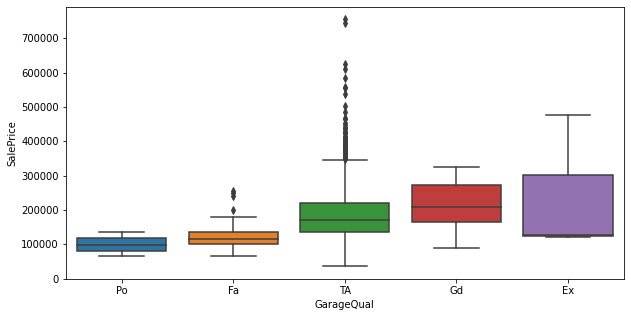

In [52]:

plt.figure(figsize=(10,5))
sn.boxplot(data = df,x='GarageQual',y='SalePrice',order=default_cat)

## Modeling

In [54]:
from sklearn.linear_model import LinearRegression
column = only_important.features.unique()
lr_o = LinearRegression(normalize=True, fit_intercept=True, positive=True)
lr_o.fit(X_tr_corr[column], y_tr)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


LinearRegression(normalize=True, positive=True)

## Avaliação Final

In [55]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

y_pred_out = lr_o.predict(X_ts_corr[column])

mae_metrics_out = round(mean_absolute_error(y_ts, y_pred_out),2)
mse_metrics_out = round(mean_squared_error(y_ts, y_pred_out,squared=False),2)

print('MAE sem outliers: ', mae_metrics_out)
print('MSE sem outliers: ', mse_metrics_out)


# SEM CORRELAÇÂO
# MAE sem outliers:  23354.31
# MSE sem outliers:  28555.3

# Com Correlação
# MAE sem outliers:  22142.16
# MSE sem outliers:  26572.59

MAE sem outliers:  23712.27
MSE sem outliers:  54888.47


Quando comparado ao modelo em que foi treinado com os outilers. Vemos que houve uma melhora significativa

In [56]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

y_pred_out = lr.predict(X_ts_corr[column])

mae_metrics = round(mean_absolute_error(y_ts, y_pred_out),2)
mse_metrics = round(mean_squared_error(y_ts, y_pred_out,squared=False),2)

print('MAE: ', mae_metrics)
print('MSE: ', mse_metrics)

# SEM CORRELAÇÂO
# MAE:  23482.49
# MSE:  29226.32


# COM Correlação
# MAE:  21677.74
# MSE:  25753.41

MAE:  23712.27
MSE:  54888.47


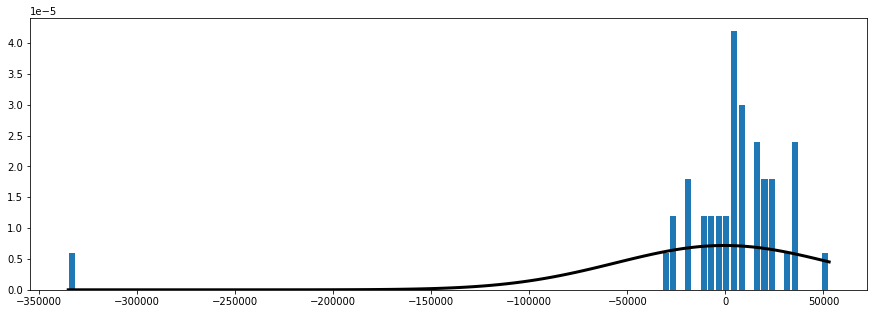

In [59]:
def normal(x,m,s):
    return 1/(np.sqrt(2*np.pi)*s) * np.exp((-1/2) * ((x-m)/s)**2)

plt.figure(figsize=(15,5))
res = y_pred_out-y_ts
plt.hist(res, bins=100, rwidth=.8, density=True)
plt.plot(np.linspace(res.min(),res.max(),100), normal(np.linspace(res.min(),res.max(),100),res.mean(), res.std(ddof=1)), 'k-', lw=3);

Talvez vale tratarmos manualmente esses casos de outliers

# Outliers

In [17]:
y_tr.describe()

count       950.000000
mean     183009.321053
std       76062.292348
min       34900.000000
25%      132312.500000
50%      165500.000000
75%      219125.000000
max      625000.000000
Name: SalePrice, dtype: float64

O cálculo para identificação desses valores é através da 1,5 * FIQ (Interquartil) do conjunto de TREINO e aplicado ao conjunto teste. 

In [1]:
outlier_max = y_tr.quantile(0.75) + 1.5*(y_tr.quantile(0.75) - y_tr.quantile(0.25))
outlier_idx = y_tr[y_tr > outlier_max].index

NameError: ignored

## Anomaly detection

A idéia é fazer um modelo de classificação para identificar outliers na base.

Lembrando que o outlier foi calculado através do método 1.5 FIQ. O limite entre uma observação normal e um outliers é:

In [60]:
outlier_max

349343.75

Temos uma total de 3% da variável dependente considerado outliter

In [61]:
y_tr_classif = y_tr.apply(lambda x:1 if x >= outlier_max else 0)
y_ts_classif = y_ts.apply(lambda x:1 if x >= outlier_max else 0)
y_tr_classif.mean()

0.03894736842105263

### Ordinal Encode

In [62]:
from sklearn.preprocessing import OrdinalEncoder
X_tr_enc_anom = X_tr_o.copy()
X_ts_enc_anom = X_ts_o.copy()

encoder = {}
default_cat = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
for col,dtype in X_tr_enc_anom.dtypes.items():
    if dtype == 'object':
      encoder[col] = OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value= -1,categories=[default_cat])
      X_tr_enc_anom.loc[:,col] = encoder[col].fit_transform(X_tr_enc_anom[[col]],)
      X_ts_enc_anom.loc[:,col] = encoder[col].transform(X_ts_enc_anom[[col]])

X_tr_enc_anom

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition
615,616,85,-1.0,80.0,8800,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,6,7,1963,1963,-1.0,-1.0,-1.0,-1.0,-1.0,156.0,2.0,3.0,-1.0,2.0,2.0,3.0,-1.0,763,-1.0,0,173,936,-1.0,4.0,-1.0,-1.0,1054,0,0,1054,1,0,1,0,3,1,3.0,6,-1.0,0,-1.0,-1.0,1963.0,-1.0,2,480,2.0,2.0,-1.0,120,0,0,0,0,0,-1.0,0,5,2010,-1.0,-1.0
613,614,20,-1.0,70.0,8402,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,5,5,2007,2007,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,2.0,2.0,-1.0,3.0,2.0,-1.0,-1.0,206,-1.0,0,914,1120,-1.0,4.0,-1.0,-1.0,1120,0,0,1120,0,0,1,0,3,1,2.0,6,-1.0,0,-1.0,-1.0,-1.0,-1.0,0,0,-1.0,-1.0,-1.0,0,30,0,0,0,0,-1.0,0,12,2007,-1.0,-1.0
1303,1304,20,-1.0,73.0,8688,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,7,5,2005,2005,-1.0,-1.0,-1.0,-1.0,-1.0,228.0,3.0,2.0,-1.0,3.0,2.0,-1.0,-1.0,0,-1.0,0,1616,1616,-1.0,4.0,-1.0,-1.0,1616,0,0,1616,0,0,2,0,3,1,3.0,7,-1.0,0,-1.0,-1.0,2005.0,-1.0,3,834,2.0,2.0,-1.0,208,59,0,0,0,0,-1.0,0,4,2006,-1.0,-1.0
486,487,20,-1.0,79.0,10289,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,5,7,1965,1965,-1.0,-1.0,-1.0,-1.0,-1.0,168.0,2.0,2.0,-1.0,2.0,2.0,-1.0,-1.0,836,-1.0,0,237,1073,-1.0,2.0,-1.0,-1.0,1073,0,0,1073,1,0,1,1,3,1,2.0,6,-1.0,0,-1.0,-1.0,1965.0,-1.0,2,515,2.0,2.0,-1.0,0,0,0,0,0,0,-1.0,0,6,2007,-1.0,-1.0
561,562,20,-1.0,77.0,10010,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,5,5,1974,1975,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,2.0,2.0,-1.0,3.0,2.0,-1.0,-1.0,1071,-1.0,123,195,1389,-1.0,3.0,-1.0,-1.0,1389,0,0,1389,1,0,1,0,2,1,2.0,6,-1.0,1,2.0,-1.0,1975.0,-1.0,2,418,2.0,2.0,-1.0,240,38,0,0,0,0,-1.0,0,4,2006,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,1096,20,-1.0,78.0,9317,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,6,5,2006,2006,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,3.0,2.0,-1.0,3.0,2.0,-1.0,-1.0,24,-1.0,0,1290,1314,-1.0,3.0,-1.0,-1.0,1314,0,0,1314,0,0,2,0,3,1,3.0,6,-1.0,1,3.0,-1.0,2006.0,-1.0,2,440,2.0,2.0,-1.0,0,22,0,0,0,0,-1.0,0,3,2007,-1.0,-1.0
1130,1131,50,-1.0,65.0,7804,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,4,3,1928,1950,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,2.0,2.0,-1.0,2.0,2.0,-1.0,-1.0,622,-1.0,0,500,1122,-1.0,2.0,-1.0,-1.0,1328,653,0,1981,1,0,2,0,4,1,3.0,7,-1.0,2,2.0,-1.0,1981.0,-1.0,2,576,2.0,2.0,-1.0,431,44,0,0,0,0,-1.0,0,12,2009,-1.0,-1.0
1294,1295,20,-1.0,60.0,8172,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,5,7,1955,1990,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,2.0,2.0,-1.0,2.0,2.0,-1.0,-1.0,167,-1.0,0,697,864,-1.0,2.0,-1.0,-1.0,864,0,0,864,1,0,1,0,2,1,2.0,5,-1.0,0,-1.0,-1.0,1957.0,-1.0,2,572,2.0,2.0,-1.0,0,0,0,0,0,0,-1.0,0,4,2006,-1.0,-1.0
860,861,50,-1.0,55.0,7642,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,7,8,1918,1998,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,3.0,2.0,-1.0,2.0,2.0,-1.0,-1.0,0,-1.0,0,912,912,-1.0,3.0,-1.0,-1.0,912,514,0,1426,0,0,1,1,3,1,3.0,7,-1.0,1,3.0,-1.0,1925.0,-1.0,1,216,2.0,2.0,-1.0,0,240,0,0,0,0,-1.0,0,6,2007,-1.0,-1.0


### Otimização dos Hiperparêmtros

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


params = {
    'criterion': ['gini','entropy'],
    'max_depth': [7,9,11,13,15],   
}


rf = GridSearchCV(
    RandomForestClassifier(n_estimators= 100,n_jobs= 4),
    params,
    cv=5,
    scoring= 'roc_auc',
    verbose=10
)

In [ ]:
rf.fit(X_tr_enc_anom,y_tr_classif)

In [65]:
rf.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=9, n_jobs=4)

### Predição e avaliação 

In [77]:
from sklearn.metrics import roc_auc_score

y_pred_ts = rf.predict(X_ts_enc_anom)
y_pred_tr = rf.predict(X_tr_enc_anom)

roc_auc_score(y_ts_classif,y_pred)


1.0

Aparentemete os dados estão sendo separados perfeitamente. Talvez exista um padrão para os preços dos outliers na base

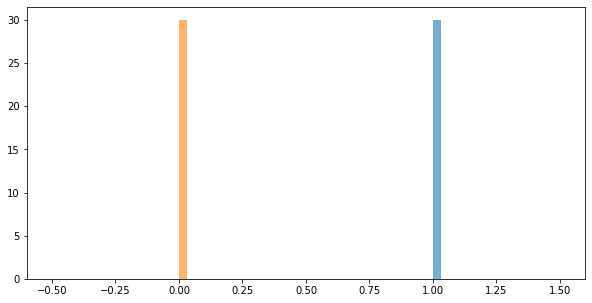

In [67]:
plt.figure(figsize=(10,5))
plt.hist(y_pred_ts[y_ts_classif == 1],bins=30,rwidth=0.9,alpha=0.6,density=True)
plt.hist(y_pred_ts[y_ts_classif == 0],bins=30,rwidth=0.9,alpha=0.6,density=True);

In [68]:
from sklearn.metrics import recall_score


roc_auc_score(y_ts_classif,y_pred)

1.0

In [69]:
feature_importance = pd.DataFrame(np.column_stack((X_ts_enc_anom.columns,rf.best_estimator_.feature_importances_)),columns=['columns','importance'])
feature_importance[feature_importance.importance > 0].sort_values('importance',ascending=False)

,columns,importance
42,1stFlrSF,0.0941221
37,TotalBsmtSF,0.0757934
16,OverallQual,0.0754016
60,GarageCars,0.0691617
45,GrLivArea,0.0686959
29,BsmtQual,0.0546208
33,BsmtFinSF1,0.0469865
61,GarageArea,0.0453083
53,TotRmsAbvGrd,0.0420919
18,YearBuilt,0.036374


In [72]:
X_tr_corr['outlier'] = y_pred_tr
X_ts_corr['outlier'] = y_pred_ts
X_tr_corr

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Condition1,Condition2,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,FireplaceQu,GarageYrBlt,GarageCars,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MoSold,YrSold,SaleType,SaleCondition,outlier
615,-0.152159,0.7,-1.0,0.425,-0.194446,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,2.0,-0.212766,-0.851351,-1.0,-1.0,-1.0,-1.0,0.892704,2.0,3.0,2.0,3.0,-1.0,0.474241,0.0,-0.569170,-1.0,4.0,-1.0,-1.0,-0.085360,0.000000,0.0,-0.667715,1.0,0.0,-1.0,0.0,0.0,0.0,3.0,-1.0,-1.0,-0.350877,0.0,-1.0,0.681818,-0.378378,0.0,0.0,0.0,0.0,-1.0,-0.333333,1.0,-1.0,-1.0,0
613,-0.154817,-0.6,-1.0,0.175,-0.291183,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.5,0.0,0.723404,0.337838,-1.0,-1.0,-1.0,-1.0,0.000000,2.0,2.0,2.0,-1.0,-1.0,-0.285909,0.0,0.732543,-1.0,4.0,-1.0,-1.0,0.045658,0.000000,0.0,-0.563901,0.0,0.0,-1.0,0.0,0.0,0.0,2.0,-1.0,-1.0,-46.292398,-2.0,-1.0,0.000000,0.027027,0.0,0.0,0.0,0.0,-1.0,2.000000,-0.5,-1.0,-1.0,0
1303,0.762126,-0.6,-1.0,0.250,-0.221669,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.5,0.0,0.680851,0.283784,-1.0,-1.0,-1.0,-1.0,1.304721,3.0,2.0,2.0,-1.0,-1.0,-0.567042,0.0,1.965744,-1.0,4.0,-1.0,-1.0,1.030273,0.000000,0.0,0.216280,0.0,0.0,0.0,0.0,0.0,0.0,3.0,-1.0,-1.0,0.631579,1.0,-1.0,1.181818,0.418919,0.0,0.0,0.0,0.0,-1.0,-0.666667,-1.0,-1.0,-1.0,0
486,-0.323588,-0.6,-1.0,0.400,0.167467,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.5,2.0,-0.170213,-0.797297,-1.0,-1.0,-1.0,-1.0,0.961373,2.0,2.0,2.0,-1.0,-1.0,0.573866,0.0,-0.456741,-1.0,2.0,-1.0,-1.0,-0.047643,0.000000,0.0,-0.637829,1.0,0.0,-1.0,1.0,0.0,0.0,2.0,-1.0,-1.0,-0.304094,0.0,-1.0,0.000000,-0.378378,0.0,0.0,0.0,0.0,-1.0,0.000000,-0.5,-1.0,-1.0,0
561,-0.223920,-0.6,-1.0,0.350,0.099654,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.5,0.0,0.021277,-0.527027,-1.0,-1.0,-1.0,-1.0,0.000000,2.0,2.0,2.0,-1.0,-1.0,0.894575,123.0,-0.530523,-1.0,3.0,-1.0,-1.0,0.579653,0.000000,0.0,-0.140779,1.0,0.0,-1.0,0.0,-1.0,0.0,2.0,-1.0,2.0,-0.070175,0.0,-1.0,1.363636,0.135135,0.0,0.0,0.0,0.0,-1.0,-0.666667,-1.0,-1.0,-1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,0.485714,-0.6,-1.0,0.375,-0.068785,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.702128,0.310811,-1.0,-1.0,-1.0,-1.0,0.000000,3.0,2.0,2.0,-1.0,-1.0,-0.534289,0.0,1.393061,-1.0,3.0,-1.0,-1.0,0.430769,0.000000,0.0,-0.258750,0.0,0.0,0.0,0.0,0.0,0.0,3.0,-1.0,3.0,0.654971,0.0,-1.0,0.000000,-0.081081,0.0,0.0,0.0,0.0,-1.0,-1.000000,-0.5,-1.0,-1.0,0
1130,0.532226,0.0,-1.0,0.050,-0.436532,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-2.0,-0.957447,-1.202703,-1.0,-1.0,-1.0,-1.0,0.000000,2.0,2.0,2.0,-1.0,-1.0,0.281815,0.0,0.005270,-1.0,2.0,-1.0,-1.0,0.458561,0.890252,0.0,0.790405,1.0,0.0,0.0,0.0,1.0,0.0,3.0,-1.0,2.0,0.070175,0.0,-1.0,2.448864,0.216216,0.0,0.0,0.0,0.0,-1.0,2.000000,0.5,-1.0,-1.0,0
1294,0.750166,-0.6,-1.0,-0.075,-0.347086,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.5,2.0,-0.382979,-0.121622,-1.0,-1.0,-1.0,-1.0,0.000000,2.0,2.0,2.0,-1.0,-1.0,-0.339133,0.0,0.351339,-1.0,2.0,-1.0,-1.0,-0.462531,0.000000,0.0,-0.966575,1.0,0.0,-1.0,0.0,-1.0,0.0,2.0,-1.0,-1.0,-0.491228,0.0,-1.0,0.000000,-0.378378,0.0,0.0,0.0,0.0,-1.0,-0.666667,-1.0,-1.0,-1.0,0
860,0.173422,0.0,-1.0,-0.200,-0.475907,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.5,3.0,-1.170213,0.094595,-1.0,-1.0,-1.0,-1.0,0.000000,3.0,2.0,2.0,-1.0,-1.0,-0.567042,0.0,0.729029,-1.0,3.0,-1.0,-1.0,-0.367246,0.700750,0.0,-0.082580,0.0,0.0,-1.0,1.0,0.

# Treinando o modelo
Com a coluna de previsão de outliers

In [78]:
from sklearn.linear_model import LinearRegression
column = only_important.features.unique()
lr_anom = LinearRegression(normalize=True, fit_intercept=True, positive=True)
lr_anom.fit(X_tr_corr[np.append(column,'outlier')], y_tr)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


LinearRegression(normalize=True, positive=True)

In [81]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

y_pred_anom = lr_anom.predict(X_ts_corr[np.append(column,'outlier')])


print('MAE: ',mean_absolute_error(y_ts, y_pred_anom))
print('RMSE: ',mean_squared_error(y_ts, y_pred_anom,squared=False))

MAE:  23430.177089075394
RMSE:  44293.24856853501


In [85]:
RMSE_anom = mean_squared_error(y_ts, y_pred_anom,squared=False)
RMSE = mse_metrics_out

print(f'A redução nos erros foi de {round((RMSE_anom - RMSE)/RMSE*100,2)}% para RMSE')


A redução nos erros foi de -19.3%


### Análise dos residuos

#### Conjunto Treino

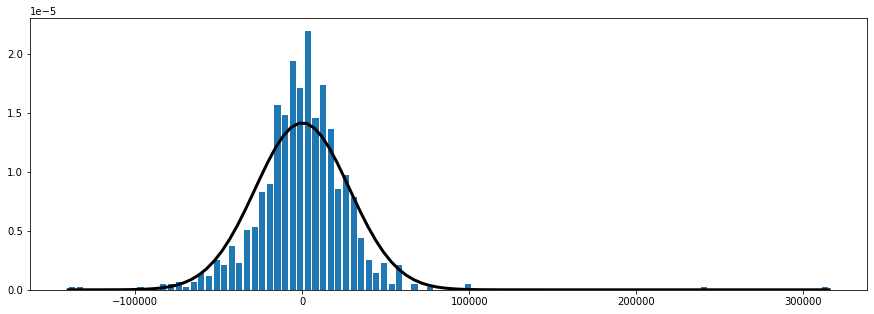

In [86]:
plt.figure(figsize=(15,5))
y_pred_tr = lr_anom.predict(X_tr_corr[np.append(column,'outlier')])
res = y_pred_tr-y_tr
plt.hist(res, bins=100, rwidth=.8, density=True)
plt.plot(np.linspace(res.min(),res.max(),100), normal(np.linspace(res.min(),res.max(),100),res.mean(), res.std(ddof=1)), 'k-', lw=3);

#### Conjunto teste

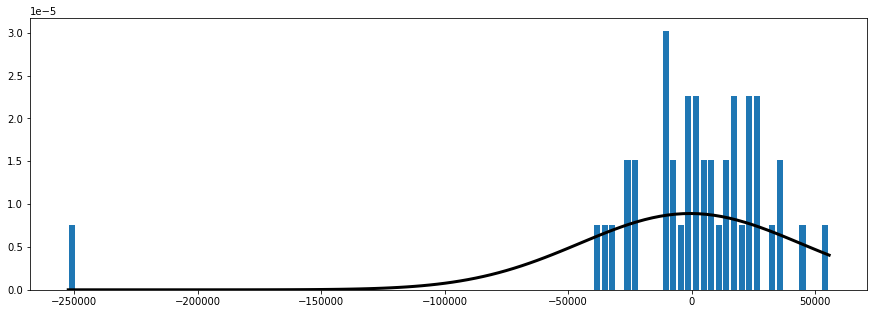

In [76]:
plt.figure(figsize=(15,5))
res = y_pred-y_ts
plt.hist(res, bins=100, rwidth=.8, density=True)
plt.plot(np.linspace(res.min(),res.max(),100), normal(np.linspace(res.min(),res.max(),100),res.mean(), res.std(ddof=1)), 'k-', lw=3);

(array([  2.,   6.,  17.,  85., 252., 287., 177.,  88.,  30.,   6.]),
 array([10.46024211, 10.74876859, 11.03729507, 11.32582155, 11.61434804,
        11.90287452, 12.191401  , 12.47992748, 12.76845396, 13.05698045,
        13.34550693]),
 <a list of 10 Patch objects>)

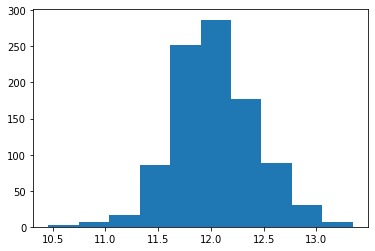

In [88]:
y_tr_log = np.log(y_tr)
plt.hist(y_tr_log)

## Modeling with Log transformation

In [93]:
from sklearn.compose import TransformedTargetRegressor
regressor = LinearRegression(fit_intercept=True, positive=True)

tt = TransformedTargetRegressor(regressor=regressor,func=np.log, inverse_func=np.exp)
tt.fit(X_tr_corr[np.append(column,'outlier')], y_tr)

TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression(positive=True))

## Avaliação

In [2]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


y_pred_tt = tt.predict(X_ts_corr[np.append(column,'outlier')])


print('MAE: ',mean_absolute_error(y_ts, y_pred_tt))
print('RMSE: ',mean_squared_error(y_ts, y_pred_tt,squared=False))
print('')
print('r2_score(y_ts,y_pred_tt)')

# MAE:  21582.27531774511
# RMSE:  36029.38259098918

NameError: ignored

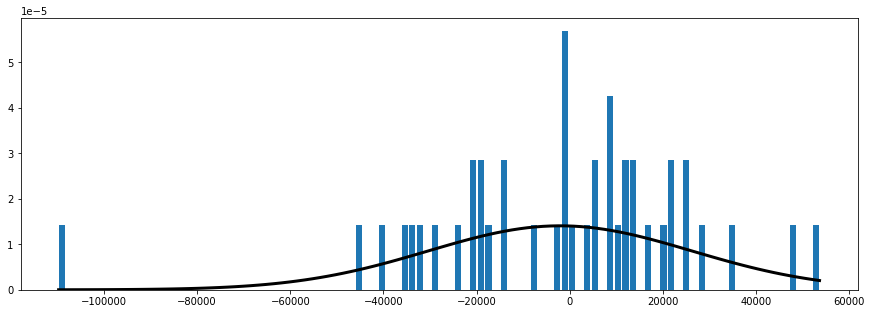

In [95]:
plt.figure(figsize=(15,5))
res = y_pred_tt-y_ts
plt.hist(res, bins=100, rwidth=.8, density=True)
plt.plot(np.linspace(res.min(),res.max(),100), normal(np.linspace(res.min(),res.max(),100),res.mean(), res.std(ddof=1)), 'k-', lw=3);

In [107]:
print(y_ts[res < -100_000],y_pred_anom[res < -100_000])

1182    745000
Name: SalePrice, dtype: int64 [492679.21715896]


In [104]:
df_coefs_lr = pd.DataFrame(np.column_stack((np.append(column,'outlier'),tt.regressor_.coef_)),columns=['features','coefs'])

df_coefs_lr.sort_values('coefs', ascending=False)

,features,coefs
18,outlier,0.210769
2,OverallQual,0.148198
10,GrLivArea,0.1101
3,YearBuilt,0.0875064
14,GarageCars,0.0872467
4,YearRemodAdd,0.0772874
11,BsmtFullBath,0.0512456
12,KitchenQual,0.0259516
13,FireplaceQu,0.0235869
15,WoodDeckSF,0.0216619
